# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = mouse_metadata.merge(study_results, how='left', on='Mouse ID')
# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(merged_data['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_data = merged_data.drop_duplicates(['Mouse ID', 'Timepoint'])

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [6]:
# Checking the number of mice in the clean DataFrame.
numMice = len(clean_data['Mouse ID'].unique())

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
columns=['Drug Regimen', 'Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary = pd.DataFrame()

summary['Drug Regimen'] = clean_data['Drug Regimen'].unique()



grouped = clean_data.groupby(['Drug Regimen'], as_index=False)['Tumor Volume (mm3)']

summary = summary.merge(grouped.mean(), how='left')
summary = summary.rename({'Tumor Volume (mm3)' : 'Mean Tumor Volume'}, axis='columns')

summary = summary.merge(grouped.median(), how='left')
summary = summary.rename({'Tumor Volume (mm3)' : 'Median Tumor Volume'}, axis='columns')

summary = summary.merge(grouped.var(), how='left')
summary = summary.rename({'Tumor Volume (mm3)' : 'Tumor Volume Variance'}, axis='columns')

summary = summary.merge(grouped.std(), how='left')
summary = summary.rename({'Tumor Volume (mm3)' : 'Tumor Volume Std. Dev.'}, axis='columns')

summary = summary.merge(grouped.sem(), how='left')
summary = summary.rename({'Tumor Volume (mm3)' : 'Tumor Volume Std. Err.'}, axis='columns')

summary = summary.merge(grouped.count(), how='left')
summary = summary.rename({'Tumor Volume (mm3)' : 'Total Number Of Mice Tested'}, axis='columns')

summary


,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.,Total Number Of Mice Tested
0,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
1,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
3,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
4,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
5,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181
6,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398,182
7,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
8,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862,156
9,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)' : ['mean','median','var','std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='Number Of Mice Tested'>

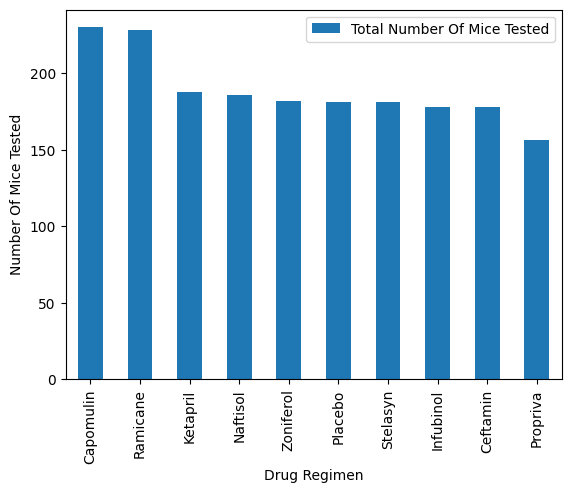

In [22]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
sorted = summary.sort_values('Total Number Of Mice Tested', ascending=False)
sorted.plot.bar(x='Drug Regimen', y='Total Number Of Mice Tested', rot=90, ylabel='Number Of Mice Tested')


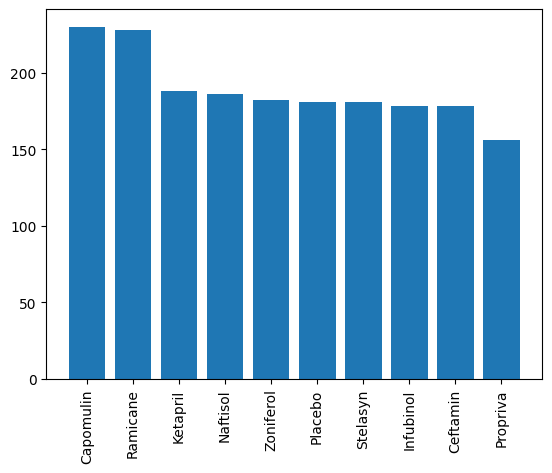

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
sorted = summary.sort_values('Total Number Of Mice Tested', ascending=False)
xAxis = sorted['Drug Regimen']
height = sorted['Total Number Of Mice Tested']
plt.bar(x=xAxis, height=height, align='center')
plt.xticks(rotation='vertical')
plt.show()


<Axes: ylabel='Sex'>

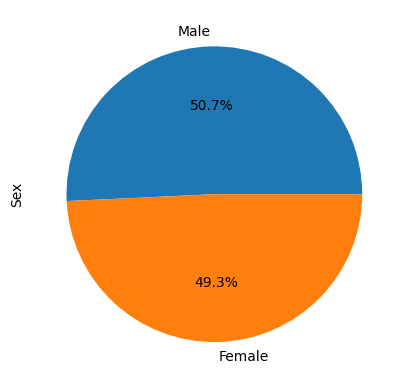

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = clean_data['Sex'].value_counts()

counts.plot(kind='pie', labels=counts.index, autopct="%1.1f%%")


In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(counts, labels=counts.index, autopct="%1.1f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [61]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_vol = clean_data[clean_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])].groupby('Mouse ID', as_index=False)['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_vol = final_vol.merge(clean_data, on=['Mouse ID', 'Timepoint'])
final_vol.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [62]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_names = final_vol['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
treatment_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_names:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_vol.loc[final_vol['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    treatment_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print the quartiles, IQR, and potential outliers for the current treatment
    print(f"{treatment} :")
    print(f"Quartiles: {quartiles}")
    print(f"IQR: {iqr}")
    print(f"Potential Outliers: {outliers.tolist()}\n")

Infubinol :
Quartiles: 0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
IQR: 11.477135160000003
Potential Outliers: [36.3213458]

Ceftamin :
Quartiles: 0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64
IQR: 15.577752179999997
Potential Outliers: []

Ramicane :
Quartiles: 0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
IQR: 9.098536719999998
Potential Outliers: []

Capomulin :
Quartiles: 0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
IQR: 7.781863460000004
Potential Outliers: []



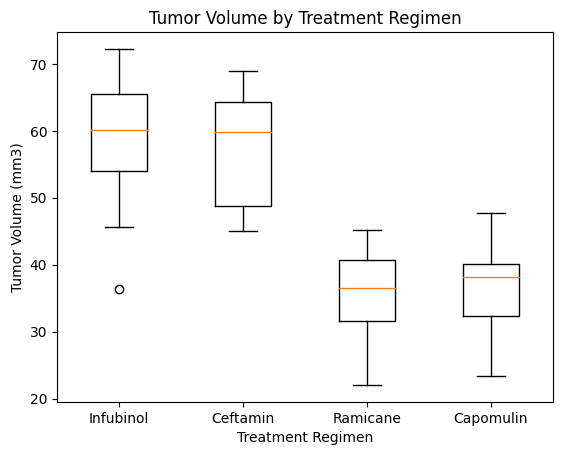

In [63]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(treatment_data, labels=treatment_names)
ax.set_title('Tumor Volume by Treatment Regimen')
ax.set_xlabel('Treatment Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

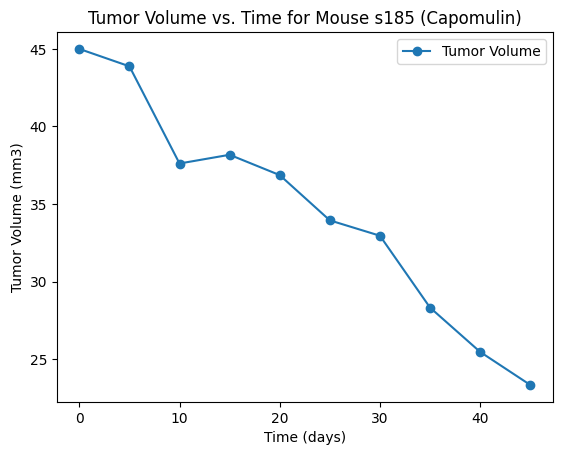

In [70]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_id = 's185'

mouse_data = clean_data[(clean_data['Mouse ID'] == mouse_id) & (clean_data['Drug Regimen'] == 'Capomulin')]

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')

plt.title(f"Tumor Volume vs. Time for Mouse {mouse_id} (Capomulin)")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(['Tumor Volume'])
plt.show()



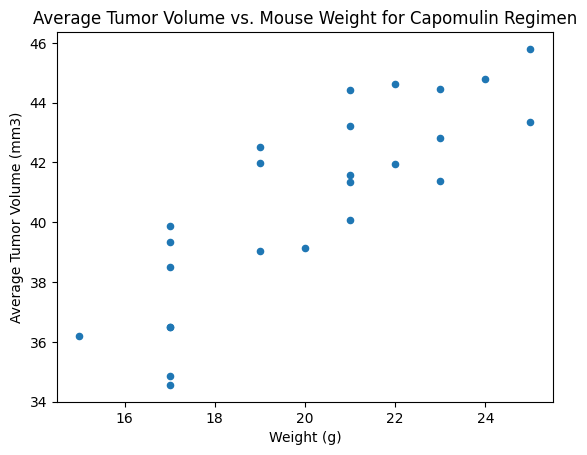

In [71]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

capomulin_grouped = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

capomulin_grouped.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')

plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


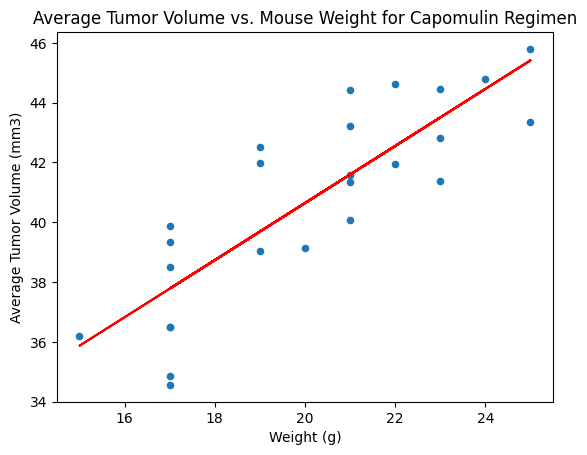

In [73]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation_coef, p_value = st.pearsonr(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coef:.2f}")

slope, intercept, rvalue, pvalue, stderr = st.linregress(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])

capomulin_grouped.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')

plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

x_values = capomulin_grouped['Weight (g)']
y_values = capomulin_grouped['Weight (g)'] * slope + intercept
plt.plot(x_values, y_values, color='red')

plt.show()
